<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Корректировка-наименований-столбцов" data-toc-modified-id="Корректировка-наименований-столбцов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Корректировка наименований столбцов</a></span></li><li><span><a href="#Обработка-пропущенных-значений" data-toc-modified-id="Обработка-пропущенных-значений-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обработка пропущенных значений</a></span></li><li><span><a href="#Преобразование-типов-данных" data-toc-modified-id="Преобразование-типов-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Преобразование типов данных</a></span></li><li><span><a href="#Дополнительные-расчеты" data-toc-modified-id="Дополнительные-расчеты-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Дополнительные расчеты</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Описание-портретов-пользователей-каждого-региона" data-toc-modified-id="Описание-портретов-пользователей-каждого-региона-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Описание портретов пользователей каждого региона</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование факторов, определяющих успешность компьютерной игры

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Ссылка на сайт ассоциации ESRB с расшифровкой условных обозначений рейтингов:
https://www.esrb.org/ratings-guide/#rat_summ

<div style="border:solid black 1px; padding: 20px">

**Описание данных**

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board), эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию
    
</div>

**Импорт библиотек**

In [1]:
# импортируем необходимые библиотеки

import pandas as pd              
import matplotlib.pyplot as plt  
import numpy as np           
import seaborn as sns          
from scipy import stats as st    

## Изучение данных из файла

In [2]:
# чтение данных из файла и сохранение в games
games = pd.read_csv('/datasets/games.csv')

# выводим первые 10 строк
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
# получим общую информацию о данных
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# получим описательную статистику для количественных переменных
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


<div style="border:solid green 3px; padding: 20px">
    
Общее количество строк в датафрейме 16715, столбцов - 11. 

Наименования столбцов отражают суть, содержащихся в них данных, в названиях сотлбцов встречаются прописные буквы, поэтому на следующем шаге приведем названия столбцов к нижнему регистру. 

Встречающиеся типы данных - вещественные числа и строковые значения.

Имеются пропущенные значения в столбцах `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score` и `Rating`, обработаем их на следующем шаге.

## Предобработка данных

### Корректировка наименований столбцов

In [5]:
# приведем наименования столбцов к нижнему регистру
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Обработка пропущенных значений

In [6]:
# найдем количество пропущенных значений в каждом из столбцов
games.isna().sum().sort_values(ascending=False)

critic_score       8578
rating             6766
user_score         6701
year_of_release     269
name                  2
genre                 2
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

In [7]:
# найдем процент пропущенных значений в каждом из столбцов
round(games.isna().sum() / games.shape[0] * 100, 2).sort_values(ascending=False)

critic_score       51.32
rating             40.48
user_score         40.09
year_of_release     1.61
name                0.01
genre               0.01
platform            0.00
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
dtype: float64

<div class="alert alert-block alert-info">
<font color='Black'>
    
Поскольку процент пропущенных значений в столбцах `name`, `year_of_release`, `genre` меньше 2%, то удалим из датафрейма строки с пропусками в данных столбцах. Пропуски в данных столбцах могли возникнуть вследствие технических сбоев при выгрузке данных из открытых источников.    

In [8]:
# отфильтруем исходный датафрейм и выберем строки с непропущенными
# значениями в столбцах `name`, `year_of_release`, `genre`
# перезапишем исходный датафрейм и обновим индексы
games = games[games['year_of_release'].isna() == False].reset_index(drop=True)
games = games[games['name'].isna() == False].reset_index(drop=True)
games = games[games['genre'].isna() == False].reset_index(drop=True)

<div class="alert alert-block alert-info">
<font color='Black'>
    
Доля пропущенных значений в столбцах `critic_score`, `rating`, `user_score` довольно существенная. Пропуски в данных столбцах могли возникнуть вследствие технических сбоев при выгрузке данных из открытых источников. Оценки критиков и оценки пользователей носят субъективный характер, поэтому пропущенные значения заполним специальным значением `-1`. Восстановить пропущенное значение рейтинга по имеющимся данным в датафрейме затруднительно, так как рейтинг не определяется однозначино в зависимости от жанра или платформы, поэтому заполним пропуски специальным значением `undef`. Далее изучим уникальнные значения в столбцах с пропусками с целью поиска неявных пропусков.

In [9]:
# проанализируем группировку строк датафрейма по платформе с пропусками в столбце 'rating'
# для поиска закономерностей в пропусках
games[games['rating'].isna() == True].groupby(by='platform').count()

,name,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
platform,,,,,,,,,,
2600,116,116,116,116,116,116,116,0,0,0
3DO,3,3,3,3,3,3,3,0,0,0
3DS,289,289,289,289,289,289,289,1,4,0
DC,38,38,38,38,38,38,38,0,0,0
DS,866,866,866,866,866,866,866,2,17,0
GB,97,97,97,97,97,97,97,0,0,0
GBA,297,297,297,297,297,297,297,0,0,0
GC,85,85,85,85,85,85,85,0,0,0
GEN,27,27,27,27,27,27,27,0,0,0


In [10]:
# проанализируем группировку строк датафрейма по жанру с пропусками в столбце 'rating'
# для поиска закономерностей в пропусках
games[games['rating'].isna() == True].groupby(by='genre').count()

,name,platform,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
genre,,,,,,,,,,
Action,1161,1161,1161,1161,1161,1161,1161,15,29,0
Adventure,853,853,853,853,853,853,853,18,24,0
Fighting,405,405,405,405,405,405,405,1,2,0
Misc,859,859,859,859,859,859,859,2,12,0
Platform,317,317,317,317,317,317,317,0,0,0
Puzzle,233,233,233,233,233,233,233,2,3,0
Racing,370,370,370,370,370,370,370,7,9,0
Role-Playing,711,711,711,711,711,711,711,3,3,0
Shooter,300,300,300,300,300,300,300,4,5,0


In [11]:
# проанализируем группировку строк датафрейма по году выпуска с пропусками в столбце 'rating'
# для поиска закономерностей в пропусках
games[games['rating'].isna() == True].groupby(by='year_of_release').count()

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
year_of_release,,,,,,,,,,
1980.0,9,9,9,9,9,9,9,0,0,0
1981.0,46,46,46,46,46,46,46,0,0,0
1982.0,36,36,36,36,36,36,36,0,0,0
1983.0,17,17,17,17,17,17,17,0,0,0
1984.0,14,14,14,14,14,14,14,0,0,0
1985.0,13,13,13,13,13,13,13,0,0,0
1986.0,21,21,21,21,21,21,21,0,0,0
1987.0,16,16,16,16,16,16,16,0,0,0
1988.0,14,14,14,14,14,14,14,0,0,0


In [12]:
# выведем уникальные значения в столбце 'rating'
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [13]:
# заполним пропуски в столбце 'rating' значением 'undef'
games['rating'] = games['rating'].fillna('undef')

In [14]:
# проанализируем группировку строк датафрейма по платформе с пропусками в столбцах 'critic_score' и 'user_score'
# для поиска закономерностей в пропусках
games[(games['critic_score'].isna() == True) & 
      (games['user_score'].isna() == True)].groupby(by='platform').count()

,name,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
platform,,,,,,,,,,
2600,116,116,116,116,116,116,116,0,0,116
3DO,3,3,3,3,3,3,3,0,0,3
3DS,287,287,287,287,287,287,287,0,0,287
DC,38,38,38,38,38,38,38,0,0,38
DS,861,861,861,861,861,861,861,0,0,861
GB,97,97,97,97,97,97,97,0,0,97
GBA,298,298,298,298,298,298,298,0,0,298
GC,85,85,85,85,85,85,85,0,0,85
GEN,27,27,27,27,27,27,27,0,0,27


In [15]:
# проанализируем группировку строк датафрейма по жанру с пропусками в столбцах 'critic_score' и 'user_score'
# для поиска закономерностей в пропусках
games[(games['critic_score'].isna() == True) & 
      (games['user_score'].isna() == True)].groupby(by='genre').count()

,name,platform,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
genre,,,,,,,,,,
Action,1138,1138,1138,1138,1138,1138,1138,0,0,1138
Adventure,834,834,834,834,834,834,834,0,0,834
Fighting,404,404,404,404,404,404,404,0,0,404
Misc,849,849,849,849,849,849,849,0,0,849
Platform,318,318,318,318,318,318,318,0,0,318
Puzzle,232,232,232,232,232,232,232,0,0,232
Racing,361,361,361,361,361,361,361,0,0,361
Role-Playing,714,714,714,714,714,714,714,0,0,714
Shooter,296,296,296,296,296,296,296,0,0,296


In [16]:
# проанализируем группировку строк датафрейма по году выпуска с пропусками в столбцах 'critic_score' и 'user_score'
# для поиска закономерностей в пропусках
games[(games['critic_score'].isna() == True) & 
      (games['user_score'].isna() == True)].groupby(by='year_of_release').count()

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
year_of_release,,,,,,,,,,
1980.0,9,9,9,9,9,9,9,0,0,9
1981.0,46,46,46,46,46,46,46,0,0,46
1982.0,36,36,36,36,36,36,36,0,0,36
1983.0,17,17,17,17,17,17,17,0,0,17
1984.0,14,14,14,14,14,14,14,0,0,14
1985.0,13,13,13,13,13,13,13,0,0,13
1986.0,21,21,21,21,21,21,21,0,0,21
1987.0,16,16,16,16,16,16,16,0,0,16
1988.0,14,14,14,14,14,14,14,0,0,14


In [17]:
# выведем уникальные значения в столбце 'critic_score'
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [18]:
# заполним пропуски в столбце 'critic_score' значением '-1'
games['critic_score'] = games['critic_score'].fillna(-1)

In [19]:
# выведем уникальные значения в столбце 'user_score'
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

<div class="alert alert-block alert-info">
<font color='Black'>
    
В столбце `user_score` имеется строкое значение `tbd`, что вероятно означает следующее. TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований. Поскольку по сути обозначение `tbd` является пропуском, то заменим его специальным значением для пропусков `-1`. 

In [20]:
# заполним пропуски в столбце 'user_score' значением '-1'
games['user_score'] = games['user_score'].fillna(-1)

# заменим 'tbd' в столбце 'user_score' значением '-1'
games['user_score'].replace('tbd',-1, inplace=True)

In [21]:
# выведем уникальные значения в столбце 'user_score'
games['user_score'].unique()

array(['8', -1, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

<div style="border:solid green 3px; padding: 20px">
    
Заменили пропущенные значения в столбцах `critic_score`, `user_score` и `rating` на специальные значения `-1`,`-1` и `undef` соответственно. Заменили являющееся по сути пропуском значение `tbd` в столбце `user_score` на специальное значенияе `-1`.
    
Удалили строки с пропусками в столбцах `name`, `year_of_release`, `genre` по причине того, что доля пропущенных значений в данных столбцах не является существенной.

### Преобразование типов данных

<div class="alert alert-block alert-info">
<font color='Black'>
    
Изменим типы данных в следующих столбцах:
- `year_of_release` — год выпуска - преобразуем к целочисленному типу данных, так как по сути год принимает только целые значения,
- `сritic_score` — оценка критиков (максимум 100) - преобразуем к целочисленному типу данных,так как по результатам анализа уникальных значений в данном столбце на предыдущем шаге оценка критиков принимает только целые значения,
- `user_score` — оценка пользователей (максимум 10) - преобразуем к вещественному типу данных, так как в данном столбце представлены только числовые значения.

In [22]:
# для преобразования типов воспользуемся функцией astype()
games['year_of_release'] = games['year_of_release'].astype('int')
games['critic_score'] = games['critic_score'].astype('int')
games['user_score'] = games['user_score'].astype('float')

In [23]:
# получим общую информацию о данных
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


<div style="border:solid green 3px; padding: 20px">
Изменили типы данных в следующих столбцах:
    
- `year_of_release` — год выпуска - на целочисленный тип данных, 
- `сritic_score` — оценка критиков (максимум 100) -  на целочисленный тип данных,
- `user_score` — оценка пользователей (максимум 10) - на вещественный тип данных.

### Дополнительные расчеты

In [24]:
# посчитаем суммарные продажи во всех регионах и запишем их в новый столбец 'all_sales'
games['all_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

<div style="border:solid green 3px; padding: 20px">
    
Сохранили в новый столбец `all_sales` суммарные продажи во всех регионах.

## Исследовательский анализ данных

<div class="alert alert-block alert-info">
<font color='Black'>
    
Проанализируем, сколько игр выпускалось в разные годы.

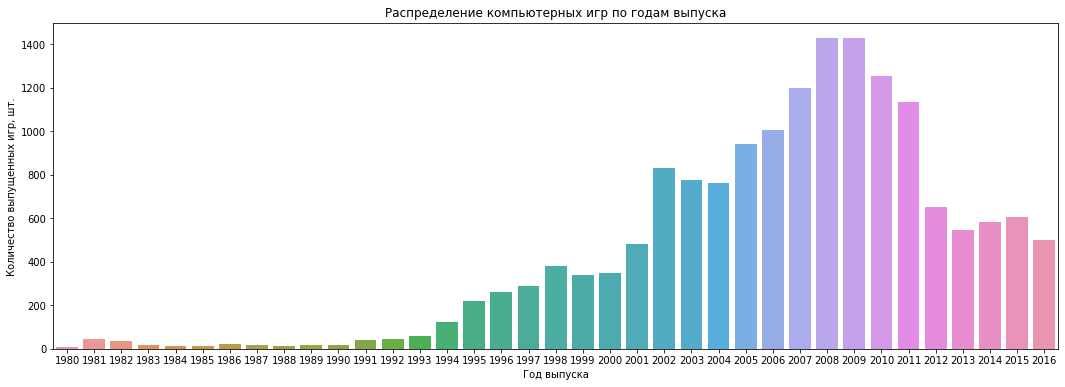

In [25]:
# построим сводную таблицу, сгруппируем игры по году выпуска и посчитаем количество игр для каждого года
pivot_games = games.pivot_table(index='year_of_release', values='name', aggfunc='count')

plt.figure(figsize=(18, 6))
plt.title('Распределение компьютерных игр по годам выпуска')

sns.barplot(x=pivot_games.index, y=pivot_games['name'])

plt.xlabel('Год выпуска')
plt.ylabel('Количество выпущенных игр, шт.');

<div class="alert alert-block alert-info">
<font color='Black'>
    
Анализируя график, можно сделать вывод, что в период с 1980 до 1995 года количество выпущенных игр было не существенным. Пики по количеству выпущенных игр приходятся на 2008 и 2009 годы. После 2009 года наблюдается спад в выпуске компьютерных игр.

<div class="alert alert-block alert-info">
<font color='Black'>

Проанализируем, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

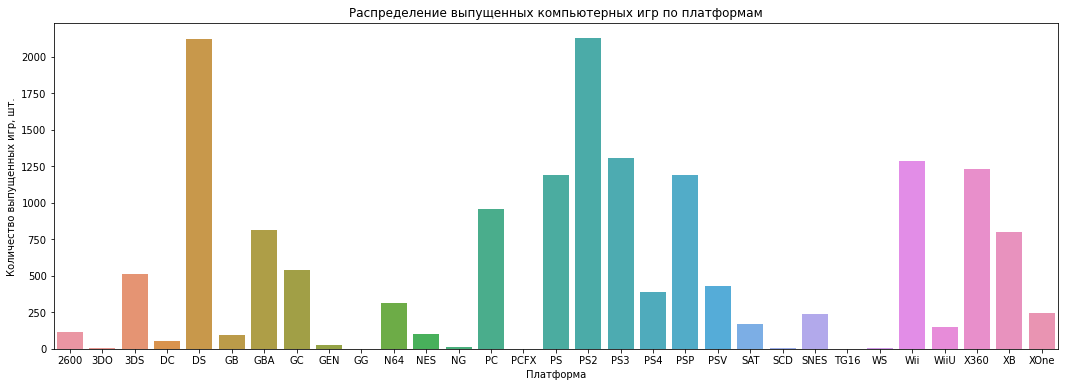

In [26]:
# построим сводную таблицу, сгруппируем игры по платформам и посчитаем количество игр для каждой платформы
pivot_games = games.pivot_table(index='platform', values='name', aggfunc='count')

plt.figure(figsize=(18, 6))
plt.title('Распределение выпущенных компьютерных игр по платформам')

sns.barplot(x=pivot_games.index, y=pivot_games['name'])

plt.xlabel('Платформа')
plt.ylabel('Количество выпущенных игр, шт.');

In [27]:
# сгруппируем исходный датафрейм по типу платформ и найдем общую сумму проданных копий для каждрй платформы
# отсортируем полученную группировку по убыванию общей суммы проданных копий
games.groupby(by=['platform'])['all_sales'].sum().sort_values(ascending=False)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: all_sales, dtype: float64

In [28]:
# сохраним топ-20 платформ по общим продажам в список popular_platform
popular_platform = games.groupby(by=['platform'])['all_sales'].sum().sort_values(ascending=False).head(20).index

In [29]:
# построим сводную таблицу количества выпущенных игр по платформам и годам выпуска
pivot_games = games.pivot_table(index='platform', columns='year_of_release', values='name', aggfunc='count')

# возьмем из сводной таблицы срез данных по топ-20 платформам из списка popular_platform
pivot_games = pivot_games.loc[popular_platform]

# сохраним в отдельный series сумму количества выпущенных игр по каждой платформе
years_platform = pivot_games.sum(axis=1)

# найдем для каждой платформы и года выпуска долю выпущенных игр относительно общего числа выпущенных игр на данной платформе
for year in pivot_games.columns:
    pivot_games[year] = pivot_games[year] / years_platform

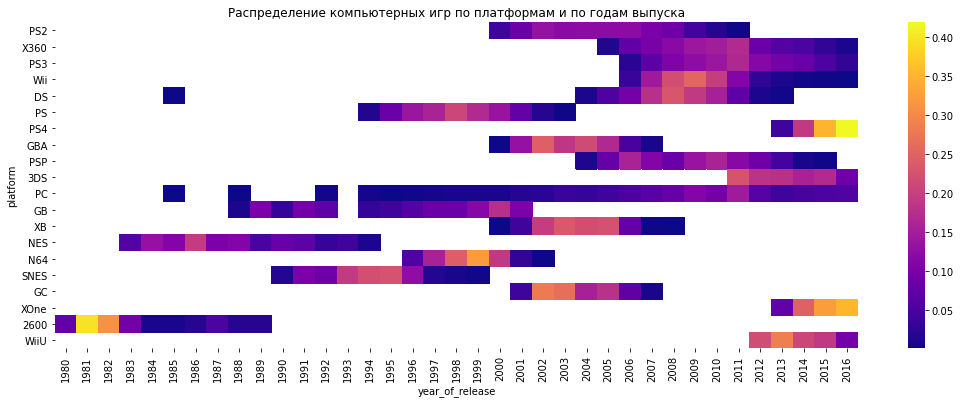

In [30]:
plt.figure(figsize=(18,6))
plt.title('Распределение компьютерных игр по платформам и по годам выпуска')

# построим тепловую карту
sns.heatmap(pivot_games, cmap='plasma');

<div class="alert alert-block alert-info">
<font color='Black'>

На полученном графике длина прямоугольника для каждой платформы представляет собой срок жизни платформы в годах. Анализируя данную длину, делаем вывод о том, что средний срок жизни платформы составляет примерно 10 лет. Из этого предположения выбивается платформа PC - персональные комьпютеры, но это объясняется тем, что персональные компьютеры технически обновляются со временем, а соответственно и выпускаемые игры для PC следуют за обновлениями персональных компьютеров. Поскольку целью исследования является прогноз на 2017 год, принимая во внимание тот факт, что данные за 2016 год могут быль неполными, выберем период, в котором имеются новые платформы со сроком жизни, не достигшим 10 лет, выпущенные не ранее 2014 года, т.е. в качестве актуального периода возьмем период, начиная с 2014 года.

In [31]:
# сохраним в отдельный датафрейм срез исходного датафрейма с играми с годом выпуска, начиная с 2014 года
games_filtered = games.query('year_of_release >= 2014').reset_index(drop=True)
games_filtered

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,undef,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1,-1.0,undef,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1,-1.0,undef,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
1684,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,undef,0.01
1685,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1,-1.0,undef,0.01
1686,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,undef,0.01
1687,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,undef,0.01


In [32]:
# построим сводную таблицу по отфильтрованному датафрейму
# найдем суммарные продажи в разрезе платформ и годов выпуска
pivot_games = (games_filtered
              .pivot_table(index='year_of_release', 
                           columns='platform', 
                           values='all_sales',    
                           aggfunc='sum'))
pivot_games

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


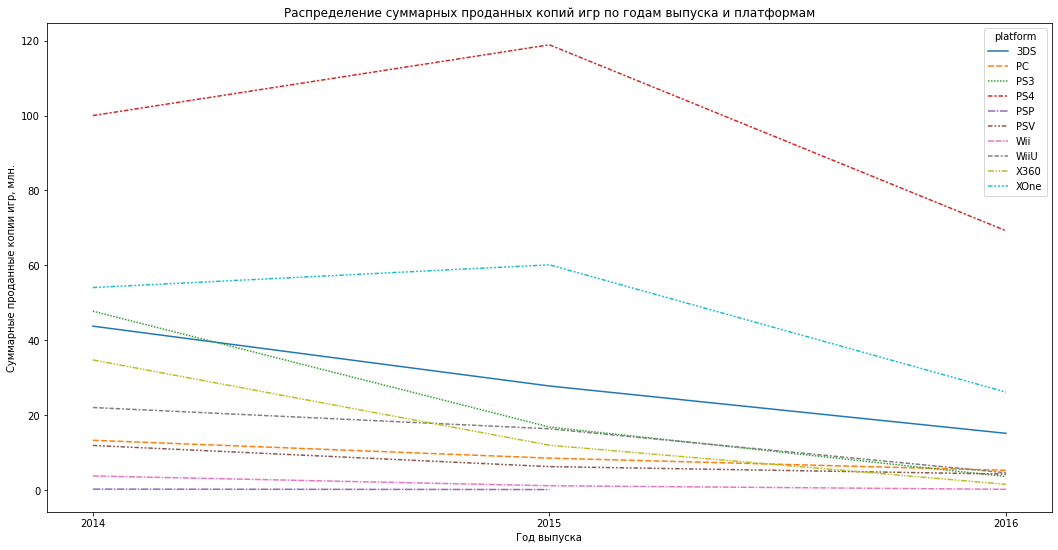

In [33]:
plt.figure(figsize=(18,9))
plt.title('Распределение суммарных проданных копий игр по годам выпуска и платформам')

sns.lineplot(data=pivot_games);

plt.xticks([2014,2015,2016])

plt.xlabel('Год выпуска')
plt.ylabel('Суммарные проданные копии игр, млн.');

<div class="alert alert-block alert-info">
<font color='Black'>

Исходя из того, что данные за 2016 год могут быть не полными, можно сделать следующие выводы: по продажам в 2015 году лидируют платформы PS4 и XOne, по данным платформам наблюдается рост продаж за рассматриваемый период. По платформам 3DS,	PC,	PS3, PSV,	Wii, WiiU, X360 наблюдается снижение продаж. По платформе PSP в 2016 году продажи отсутствуют. 

Таким образом, потенциально прибыльными являются платформы PS4 и XOne.

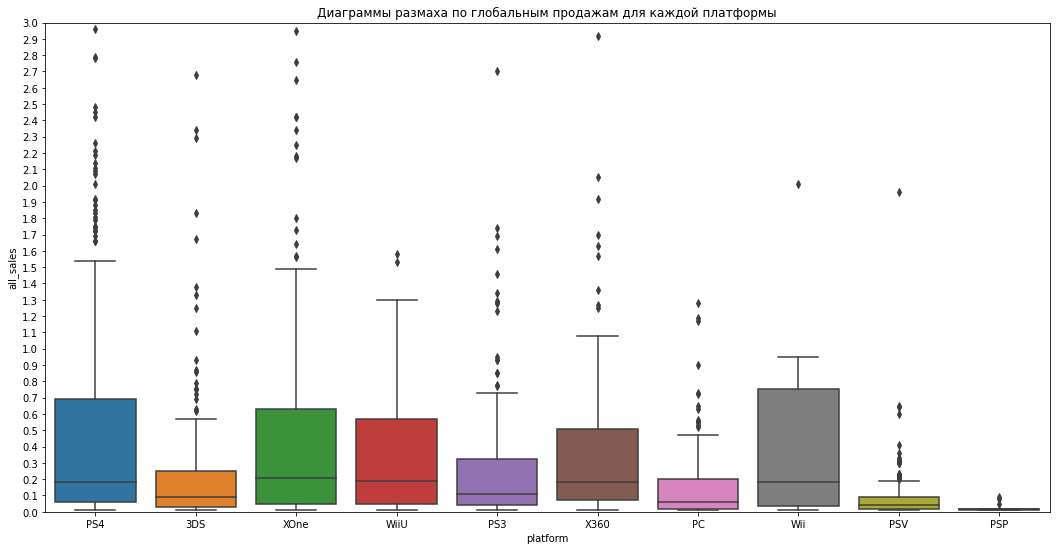

In [34]:
plt.figure(figsize=(18,9))
plt.title('Диаграммы размаха по глобальным продажам для каждой платформы')
plt.ylim(0,3)

sns.boxplot(x=games_filtered['platform'], y=games_filtered['all_sales'])

# сформируем список делений на оси Y с шагом 0.1
y_ticks = []
for i in range(0,31):
    y_ticks.append(i*0.1)
    
plt.yticks(y_ticks);

<div class="alert alert-block alert-info">
<font color='Black'>

По диаграммам размаха можно сделать выводы о том, что медианы глобальных продаж в разрезе каждой платформы не превышают 0.3 млн копий, медианы расположены ближе к границе 1-го квартиля, т.е. для каждой платформы примерно для 50% игр глобальные продажи не превышают 0.3 млн копий. Имеются игры, для которых глобальные продажи выходят за границы усов (выбросы) и отображаются на графике в виде точек, данные выбросы не единичны и имеют место почти для каждой платформы. Поскольку мы анализируем данные только за актуальный период, некоторые платформы только набирают обороты по продажам, а некоторые наоборот находились в стадии затухания продаж по состоянию на начало актуального периода.

In [35]:
# возьмем срезы исходного датафрейма по трем популярным платформам  X360, XOne, PS4 и сохраним их в отдельные датафреймы
games_x360 = games_filtered[games_filtered['platform'] == 'X360'].reset_index(drop=True)
games_xone = games_filtered[games_filtered['platform'] == 'XOne'].reset_index(drop=True)
games_ps4 = games_filtered[games_filtered['platform'] == 'XOne'].reset_index(drop=True)

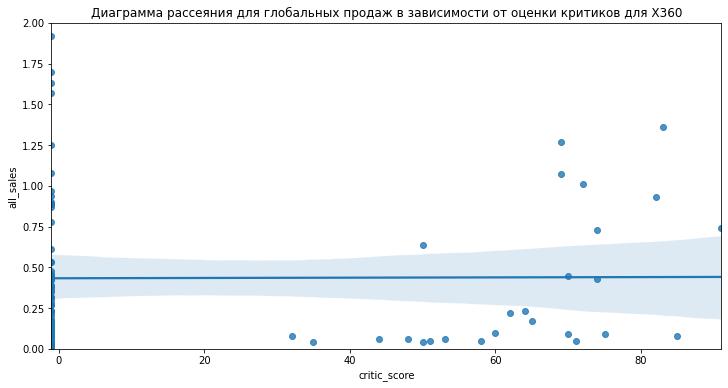

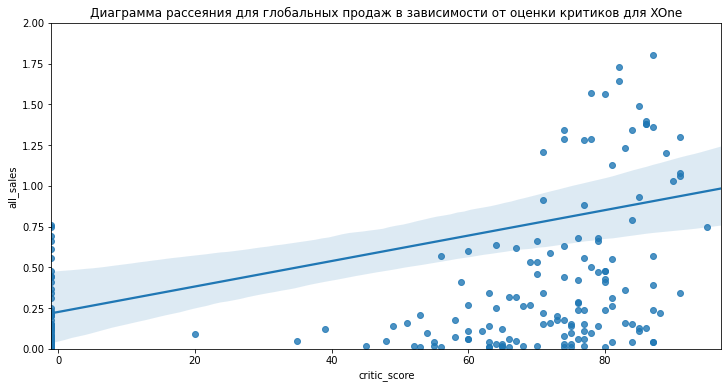

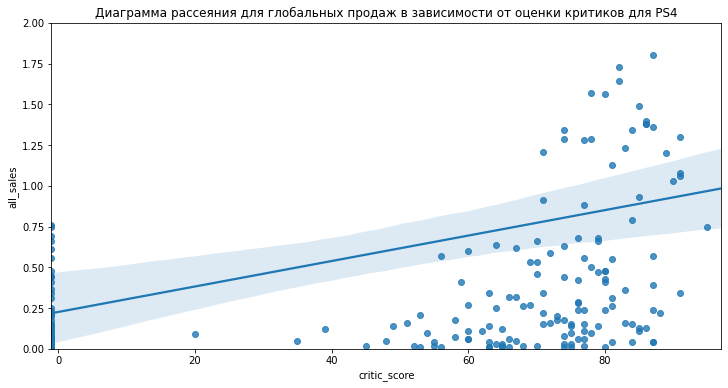

In [36]:
# построим диаграммы рассеяния и попытаемся установить зависимость между оценкой критиков и глобальными продажами
plt.figure(figsize=(12,6))
plt.title('Диаграмма рассеяния для глобальных продаж в зависимости от оценки критиков для X360')
plt.ylim(0,2)
sns.regplot(x=games_x360['critic_score'], y=games_x360['all_sales'])
plt.show();

plt.figure(figsize=(12,6))
plt.title('Диаграмма рассеяния для глобальных продаж в зависимости от оценки критиков для XOne')
plt.ylim(0,2)
sns.regplot(x=games_xone['critic_score'], y=games_xone['all_sales'])
plt.show();

plt.figure(figsize=(12,6))
plt.title('Диаграмма рассеяния для глобальных продаж в зависимости от оценки критиков для PS4')
plt.ylim(0,2)
sns.regplot(x=games_ps4['critic_score'], y=games_ps4['all_sales']);

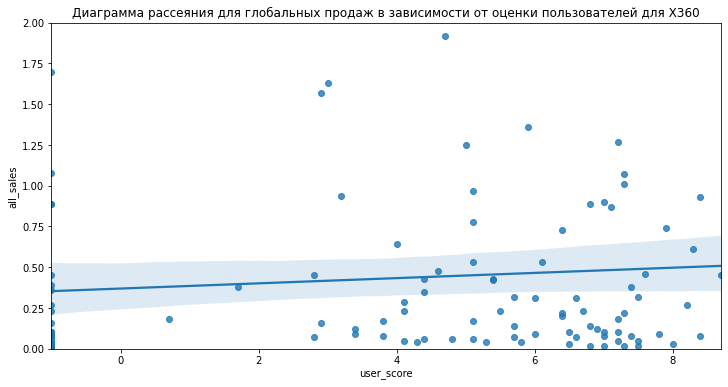

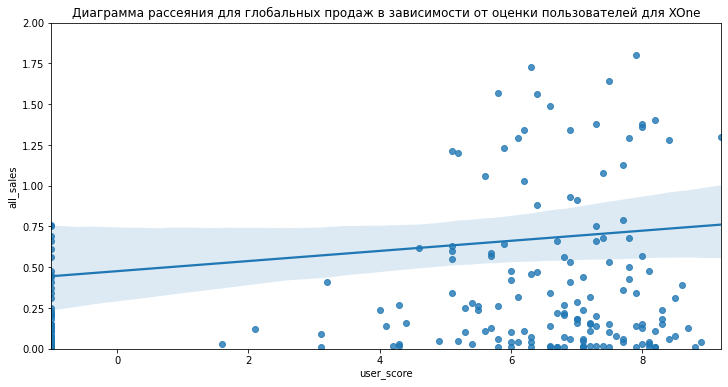

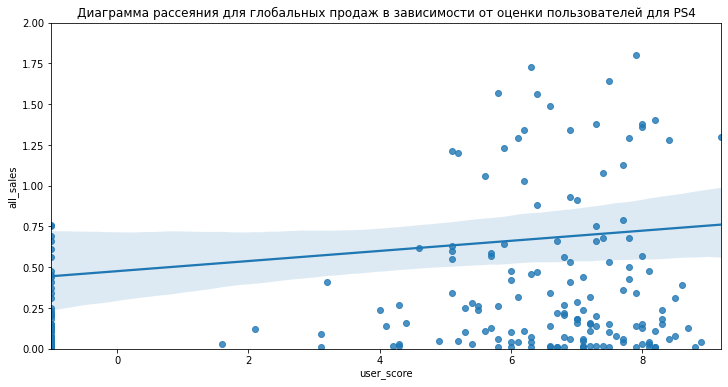

In [37]:
# построим диаграммы рассеяния и попытаемся установить зависимость между оценкой пользователей и глобальными продажами
plt.figure(figsize=(12,6))
plt.title('Диаграмма рассеяния для глобальных продаж в зависимости от оценки пользователей для X360')
plt.ylim(0,2)
sns.regplot(x=games_x360['user_score'], y=games_x360['all_sales'])
plt.show();

plt.figure(figsize=(12,6))
plt.title('Диаграмма рассеяния для глобальных продаж в зависимости от оценки пользователей для XOne')
plt.ylim(0,2)
sns.regplot(x=games_xone['user_score'], y=games_xone['all_sales'])
plt.show();

plt.figure(figsize=(12,6))
plt.title('Диаграмма рассеяния для глобальных продаж в зависимости от оценки пользователей для PS4')
plt.ylim(0,2)
sns.regplot(x=games_ps4['user_score'], y=games_ps4['all_sales']);


In [38]:
print('Коэфициенты корреляции между глобальными продажами и оценками критиков')
print('X360:', round(games_x360['all_sales'].corr(games_x360['critic_score']),2))
print('XOne:', round(games_xone['all_sales'].corr(games_xone['critic_score']),2))
print('PS4 :', round(games_ps4['all_sales'].corr(games_ps4['critic_score']),2))

Коэфициенты корреляции между глобальными продажами и оценками критиков
X360: 0.0
XOne: 0.27
PS4 : 0.27


In [39]:
print('Коэфициенты корреляции между глобальными продажами и оценками пользователей')
print('X360:', round(games_x360['all_sales'].corr(games_x360['user_score']),2))
print('XOne:', round(games_xone['all_sales'].corr(games_xone['user_score']),2))
print('PS4 :', round(games_ps4['all_sales'].corr(games_ps4['user_score']),2))

Коэфициенты корреляции между глобальными продажами и оценками пользователей
X360: 0.08
XOne: 0.11
PS4 : 0.11


<div class="alert alert-block alert-info">
<font color='Black'>
    
Диаграммы рассеяния для глобальных продаж в зависимости от оценки критиков для платформ X360, XOne, PS4, а также коэффициенты корреляции между глобальными продажами и оценками критиков говорят о наличии слабой связи между рассматриваемыми параметрами.
    
Диаграммы рассеяния для глобальных продаж в зависимости от оценки пользователей для платформ X360, XOne, PS4, а также коэффициенты корреляции между глобальными продажами и оценками пользователей говорят об отсутствии связи между рассматриваемыми параметрами.    

In [40]:
# построим сводные таблицы по исходному датафрейму, сгруппировав игры по жанрам 
# и найдем количество выпущенных игр в разрезе жанров и средние суммарные продажи в разрезе жанров
pivot_games_count = games_filtered.pivot_table(index='genre', values='name', aggfunc='count')
pivot_games_sales = games_filtered.pivot_table(index='genre', values='all_sales', aggfunc='mean')

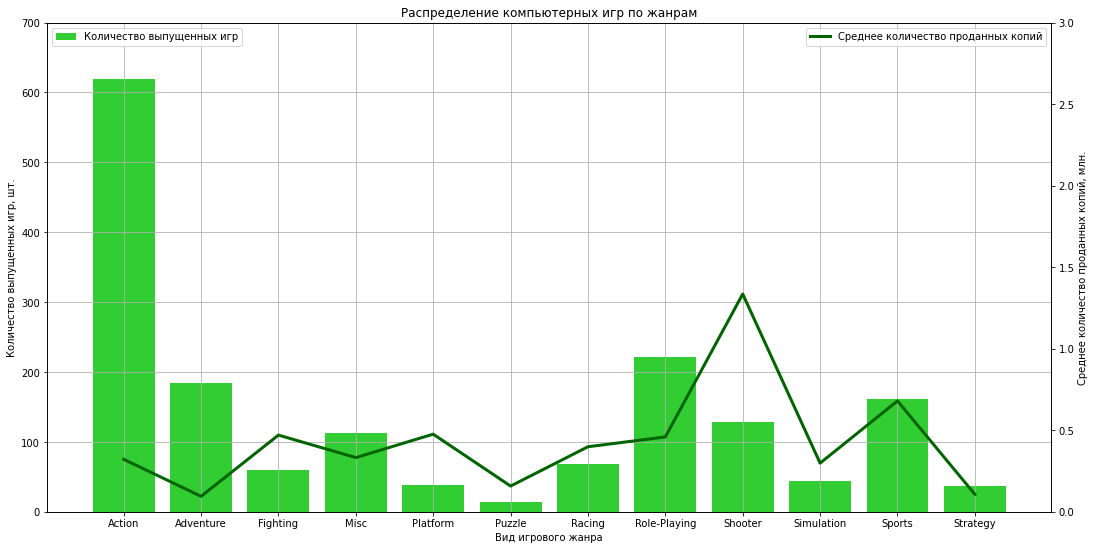

In [41]:
fig, ax1 = plt.subplots()

fig.set_figwidth(18)
fig.set_figheight(9)

ax2 = ax1.twinx()

ax1.bar(pivot_games_count.index, 
        pivot_games_count['name'],
        color='limegreen', 
        label='Количество выпущенных игр')

ax2.plot(pivot_games_sales.index, 
         pivot_games_sales['all_sales'], 
         linewidth = 3, 
         color='darkgreen', 
         label='Среднее количество проданных копий')

ax1.set_title('Распределение компьютерных игр по жанрам')
ax1.set_xlabel('Вид игрового жанра')
ax1.set_ylabel('Количество выпущенных игр, шт.')
ax2.set_ylabel('Среднее количество проданных копий, млн.')

ax1.set_ylim(0,700)
ax2.set_ylim(0,3)

ax1.legend(loc='upper left')
ax1.grid()
ax2.legend(loc='upper right');

<div class="alert alert-block alert-info">
<font color='Black'>
 
Топ-5 жанров по количеству выпущенных игр выглядит следующим образом: 
1. Action 
2. Role-Playing 
3. Adventure 
4. Sports 
5. Shooter   
    
Топ-5 жанров по средней величине продаж выглядит следующим образом:   
    
1. Shooter 
2. Sports
3. Platform
4. Fighting 
5. Role-Playing 
    
По оценке средней величины продаж наиболее прибыльным является жанр Shooter, на втором месте жанр Sports, на третьем - Platform. Больше всего выпускается игр жанра Action, при этом данный жанр не входит в топ-5 жанров по прибыльности. Наиболее низкие значения средней величины продаж у жанров Adventure, Strategy, Puzzle.    

<div style="border:solid green 3px; padding: 20px">
    
Исходя из того, что данные за 2016 год могут быть не полными, можно сделать следующие выводы: по продажам в 2015 году лидируют платформы PS4 и XOne, по данным платформам наблюдается рост продаж за актуальный период. По платформам 3DS,	PC,	PS3, PSV,	Wii, WiiU, X360 наблюдается снижение продаж. По платформе PSP в 2016 году продажи отсутствуют. 

Таким образом, потенциально прибыльными являются платформы PS4 и XOne.
    
Существенной корреляции между глобальными продажами и оценками критиков и пользователей для популярных платформ не обнаружено.
    
Топ-5 жанров по средней величине продаж выглядит следующим образом:   
    
1. Shooter 
2. Sports
3. Platform
4. Fighting 
5. Role-Playing 
    
По оценке средней величины продаж наиболее прибыльным является жанр Shooter, на втором месте жанр Sports, на третьем - Platform. Больше всего выпускается игр жанра Action, при этом данный жанр не входит в топ-5 жанров по прибыльности. Наиболее низкие значения средней величины продаж у жанров Adventure, Strategy, Puzzle.  

## Описание портретов пользователей каждого региона

<div class="alert alert-block alert-info">
<font color='Black'>
    
Определим для пользователя каждого региона (NA, EU, JP):
- самые популярные платформы (топ-5),
- самые популярные жанры (топ-5),
- влияние рейтингов ESRB на продажи в отдельном регионе.   

In [42]:
# создадим сводную таблицу, сгруппировав игры по платформам и просуммируем продажи для каждого региона
platform_games = games_filtered.pivot_table(index='platform', 
                                            values=['na_sales','eu_sales','jp_sales','other_sales'], 
                                            aggfunc='sum').reset_index()
platform_games

,platform,eu_sales,jp_sales,na_sales,other_sales
0,3DS,16.12,44.24,22.64,3.68
1,PC,17.97,0.00,7.23,1.85
2,PS3,25.54,11.22,22.05,9.37
3,PS4,130.04,15.02,98.61,44.48
4,PSP,0.00,0.36,0.00,0.00
5,PSV,3.53,14.54,2.52,1.81
6,Wii,2.59,0.00,2.08,0.40
7,WiiU,13.15,7.31,19.36,3.16
8,X360,15.49,0.08,28.30,4.35
9,XOne,46.25,0.32,81.27,12.52


In [43]:
# создадим словарь для расшифровки названий регионов
region_dict = {'na_sales': 'Северная Америка',
               'eu_sales': 'Европа',
               'jp_sales': 'Япония',
               'other_sales': 'Другие страны'}

region = ['na_sales','eu_sales','jp_sales','other_sales'];
color = ['salmon','teal','lightblue','plum']

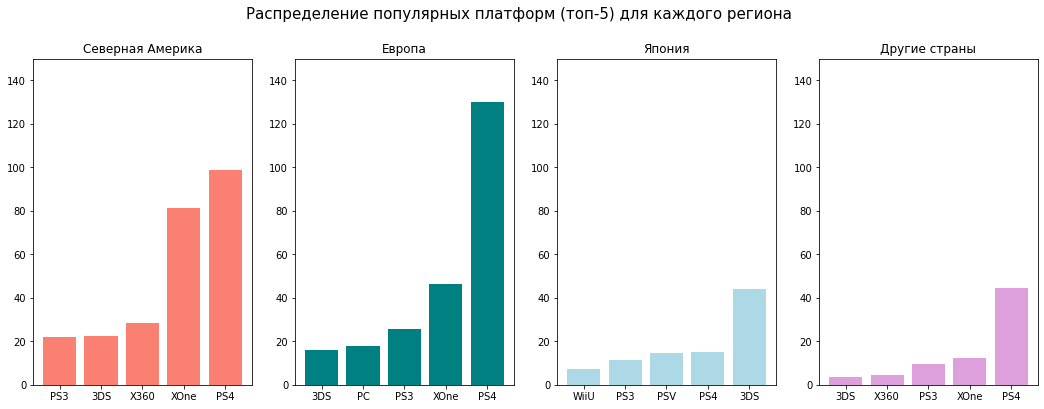

In [44]:
# построим графики распределения популярных платформ (топ-5) для каждого региона
# популярность будем определять по суммарным продажам игр для каждой плафтормы
fig, axes = plt.subplots(1, 4)

#  заголовок области Figure
fig.suptitle('Распределение популярных платформ (топ-5) для каждого региона', y = 1.0, fontsize = 15)

i = 0
for ax in axes.ravel():
    names=platform_games.sort_values(by=region[i])[-5:]['platform']
    values=platform_games.sort_values(by=region[i])[-5:][region[i]]
    ax.set_ylim([0, 150])
    ax.bar(names, values, color=color[i]);
    ax.set_title(region_dict[region[i]])
    i += 1

fig.set_figheight(6)
fig.set_figwidth(18)
plt.show()

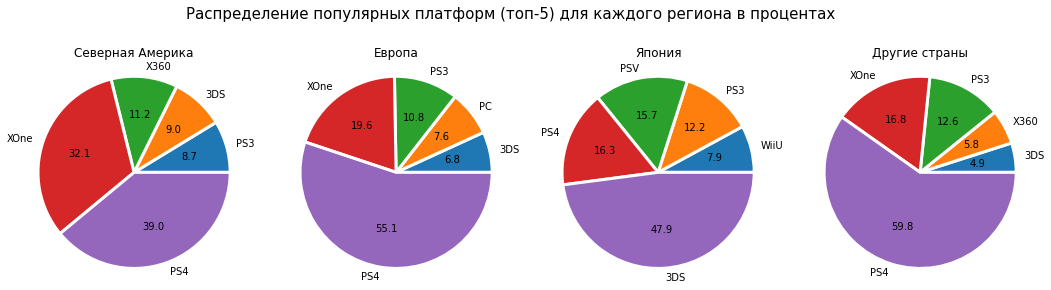

In [45]:
fig, axes = plt.subplots(1, 4)

#  заголовок области Figure
fig.suptitle('Распределение популярных платформ (топ-5) для каждого региона в процентах', y = 0.63, fontsize = 15)

i = 0
for ax in axes.ravel():
    names=platform_games.sort_values(by=region[i])[-5:]['platform']
    values=platform_games.sort_values(by=region[i])[-5:][region[i]]
    ax.pie(values, labels=names, labeldistance=1.1, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, autopct='%.1f', radius = 1.1);
    ax.set_title(region_dict[region[i]])
    i += 1

fig.set_figheight(18)
fig.set_figwidth(18)
plt.show()

<div class="alert alert-block alert-info">
<font color='Black'>
    
Для Северной Америки топ-5 популярных платформ [PS4, XOne, X360, 3DS, PS3].

Для Европы топ-5 популярных платформ [PS4, XOne, PS3, PC, 3DS].

Для Японии топ-5 популярных платформ [3DS, PS4, PSV, PS3, WiiU].

Для других стран топ-5 популярных платформ [PS4, XOne, PS3,  X360, 3DS].
    
В Северной Америке, Европе и других странах наиболее популярна платформа PS4, на втором месте - XOne. В Европе в топ-5 популярных платформ вошли игры для персональных компьютеров PC. В Японии наиболее популярны платформы японских производителей, можно отметить существенную долю портативных игровых платформ (3DS, PSV, WiiU).   

In [46]:
# создадим сводную таблицу, сгруппировав игры по жанрам и просуммируем продажи для каждого региона
genre_games = games_filtered.pivot_table(index='genre', 
                                         values=['na_sales','eu_sales','jp_sales','other_sales'], 
                                         aggfunc='sum').reset_index()
genre_games

,genre,eu_sales,jp_sales,na_sales,other_sales
0,Action,74.68,29.58,72.53,22.57
1,Adventure,6.49,3.60,5.64,1.82
2,Fighting,6.69,6.37,12.43,2.73
3,Misc,12.86,5.61,15.05,4.03
4,Platform,6.80,2.69,6.79,1.81
5,Puzzle,0.52,0.93,0.65,0.11
6,Racing,14.13,1.76,8.74,2.89
7,Role-Playing,28.17,31.16,33.47,8.64
8,Shooter,65.52,4.87,79.02,21.53
9,Simulation,7.30,2.31,2.63,0.89


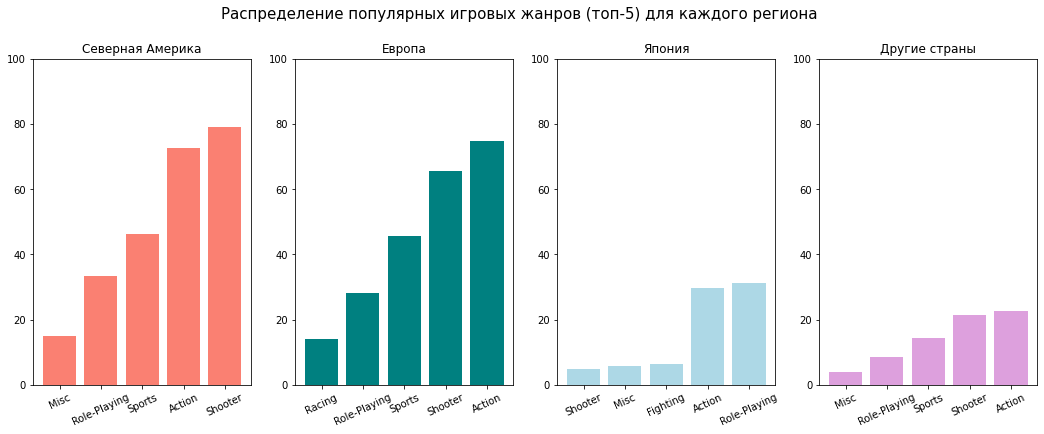

In [47]:
# построим графики распределения популярных жанров (топ-5) для каждого региона
# популярность будем определять по суммарным продажам игр для каждого жанра
fig, axes = plt.subplots(1, 4)

#  заголовок области Figure
fig.suptitle('Распределение популярных игровых жанров (топ-5) для каждого региона', y = 1.0, fontsize = 15)

i = 0
for ax in axes.ravel():
    names=genre_games.sort_values(by=region[i])[-5:]['genre']
    values=genre_games.sort_values(by=region[i])[-5:][region[i]]
    ax.set_ylim([0, 100])
    ax.bar(names, values, color=color[i]);
    ax.set_title(region_dict[region[i]])
    ax.tick_params(axis = 'x', labelrotation = 25)    #  поворот подписей
    i += 1

fig.set_figheight(6)
fig.set_figwidth(18)
plt.show()

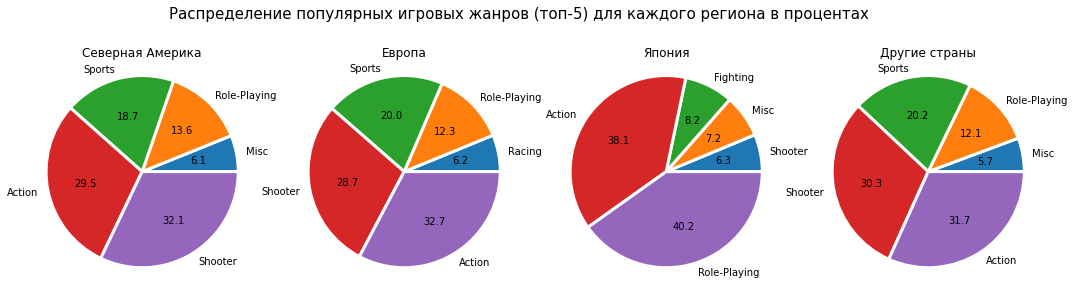

In [48]:
fig, axes = plt.subplots(1, 4)

#  заголовок области Figure
fig.suptitle('Распределение популярных игровых жанров (топ-5) для каждого региона в процентах', y = 0.63, fontsize = 15)

i = 0
for ax in axes.ravel():
    names=genre_games.sort_values(by=region[i])[-5:]['genre']
    values=genre_games.sort_values(by=region[i])[-5:][region[i]]
    ax.pie(values, labels=names, labeldistance=1.1, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, autopct='%.1f', radius = 1.1);
    ax.set_title(region_dict[region[i]])
    i += 1

fig.set_figheight(18)
fig.set_figwidth(18)
plt.show()

<div class="alert alert-block alert-info">
<font color='Black'>
    
Для Северной Америки топ-5 популярных жанров [Shooter, Action, Sports, Role-Playing, Misc].

Для Европы топ-5 популярных жанров [Action, Shooter, Sports, Role-Playing, Racing].

Для Японии топ-5 популярных жанров [Role-Playing, Action, Fighting, Misc,  Shooter].

Для других стран топ-5 популярных жанров [Action, Shooter, Sports, Role-Playing, Misc].
    
Для Северной Америки и других стран топ-5 популярных жанров практически одинаков, в Северной Америке наиболее популярен жанр Shooter, в других странах - Action. Для Европы в топ-5 вошел жанр Racing и при этом отсутствует жанр Misc. В Японии топ-5 популярных жанров отличается от других стран, на первом месте находится жанр Role-Playing, в топ-5 отсутствует жанр Sports, но при этом имеется жанр Fighting.

In [49]:
# создадим сводную таблицу, сгруппировав игры по рейтингу и просуммируем продажи для каждого региона
esrb_games = games_filtered.pivot_table(index='rating', 
                                        values=['na_sales','eu_sales','jp_sales','other_sales'], 
                                        aggfunc='sum').reset_index()
esrb_games

,rating,eu_sales,jp_sales,na_sales,other_sales
0,E,58.06,8.94,50.74,15.39
1,E10+,26.16,4.46,33.23,7.83
2,M,93.44,8.01,96.42,28.67
3,T,34.07,14.78,38.95,11.33
4,undef,58.95,56.90,64.72,18.40


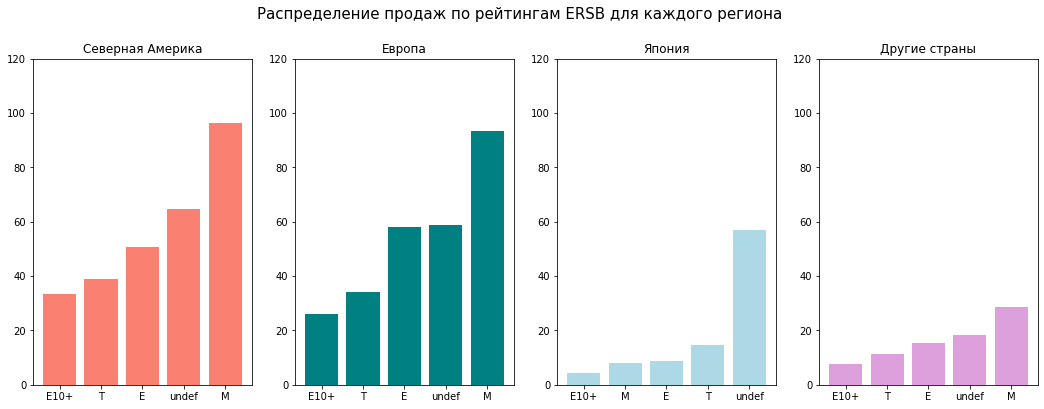

In [50]:
# построим графики распределения продаж по рейтингам для каждого региона
fig, axes = plt.subplots(1, 4)

#  заголовок области Figure
fig.suptitle('Распределение продаж по рейтингам ERSB для каждого региона', y = 1.0, fontsize = 15)

i = 0
for ax in axes.ravel():
    names=esrb_games.sort_values(by=region[i])[-5:]['rating']
    values=esrb_games.sort_values(by=region[i])[-5:][region[i]]
    ax.set_ylim([0, 120])
    ax.bar(names, values, color=color[i]);
    ax.set_title(region_dict[region[i]])
 #   ax.tick_params(axis = 'x', labelrotation = 25)    #  поворот подписей
    i += 1

fig.set_figheight(6)
fig.set_figwidth(18)
plt.show()

<div class="alert alert-block alert-info">
<font color='Black'>
    
Для Северной Америки, Европы и других стран наиболее продаваемыми являются игры с рейтингом Mature 17+ (M), на втором месте - игры с пропущенным рейтингом, на третьем месте - игры с рейтингом для всех Everyone (E). В Японии существенную доля продаж занимают игры с пропущенным рейтингом, потребуется дополнительное исследование для определения пропущенного рейтинга.
   

<div style="border:solid green 3px; padding: 20px">
    
В Северной Америке, Европе и других странах наиболее популярна платформа PS4, на втором месте - XOne. В Европе в топ-5 популярных платформ вошли игры для персональных компьютеров PC. В Японии наиболее популярны платформы японских производителей, можно отметить существенную долю портативных игровых платформ (3DS, PSV, WiiU).       
    
Для Северной Америки и других стран топ-5 популярных жанров практически одинаков [Shooter, Action, Sports, Role-Playing, Misc], с отличием в том, что в Северной Америке наиболее популярен жанр Shooter, в других странах - Action. Для Европы в топ-5 вошел жанр Racing и при этом отсутствует жанр Misc. В Японии топ-5 популярных жанров отличается от других стран, на первом месте находится жанр Role-Playing, в топ-5 отсутствует жанр Sports, но при этом имеется жанр Fighting.
    
Для Северной Америки, Европы и других стран наиболее продаваемыми являются игры с рейтингом Mature 17+ (M), на втором месте - игры с пропущенным рейтингом, на третьем месте - игры с рейтингом для всех Everyone (E). В Японии существенную доля продаж занимают игры с пропущенным рейтингом, потребуется дополнительное исследование для определения пропущенного рейтинга. 

## Проверка гипотез

<div class="alert alert-block alert-info">
<font color='Black'>

Проверим следующие гипотезы:
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

<div class="alert alert-block alert-info">
<font color='Black'>

Проверим первую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
  
Сформулируем гипотезу $Н_0$: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
Альтернативную гипотезу $Н_1$ сформулируем следующим образом: средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [51]:
# выделим игры по рассматриваемым платформам в отдельные датафреймы для каждой платформы
# при этом исключим пропуски в пользовательских рейтингах
games_xone = games.query('(platform == "XOne") and (user_score!=-1)').reset_index(drop=True)
games_pc = games.query('(platform == "PC") and (user_score!=-1)').reset_index(drop=True)

# найдем размер имеющихся выборок по платформам
print('Размер выборки для платформы XOne:', games_xone.shape[0])
print('Размер выборки для платформы PC  :', games_pc.shape[0])  

Размер выборки для платформы XOne: 182
Размер выборки для платформы PC  : 755


In [52]:
# критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
alpha = .05

# воспользуемся специальным методом для проверки гипотезы о равенстве среднего 
# двух генеральных совокупностей по взятым из них выборкам
# выборки разного размера, поэтому параметр equal_var = False
result = st.ttest_ind(games_xone['user_score'], 
                      games_pc['user_score'],
                      equal_var = False)

print('p-значение: ', result.pvalue)

if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC")
else:
    print("Принимаем нулевую гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC") 
    
print('Средний пользовательский рейтинг для платформы XOne:', round(games_xone['user_score'].mean(),1))
print('Средний пользовательский рейтинг для платформы PC  :', round(games_pc['user_score'].mean(),1))      

p-значение:  4.5385802963771776e-06
Отвергаем нулевую гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC
Средний пользовательский рейтинг для платформы XOne: 6.5
Средний пользовательский рейтинг для платформы PC  : 7.1


<div class="alert alert-block alert-info">
<font color='Black'>

Проверим вторую гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные.
  
Сформулируем гипотезу $Н_0$: средние пользовательские рейтинги жанров Action и Sports одинаковые.
Альтернативную гипотезу $Н_1$ сформулируем следующим образом: средние пользовательские рейтинги жанров Action и Sports разные.

In [53]:
# выделим игры по рассматриваемым жанрам в отдельные датафреймы для каждого жанра
# при этом исключим пропуски в пользовательских рейтингах
games_action = games.query('(genre == "Action") and (user_score!=-1)').reset_index(drop=True)
games_sports = games.query('(genre == "Sports") and (user_score!=-1)').reset_index(drop=True)

# найдем размер имеющихся выборок по жанрам
print('Размер выборки для жанра Action:', games_action.shape[0])
print('Размер выборки для жанра Sports:', games_sports.shape[0])  

Размер выборки для жанра Action: 1796
Размер выборки для жанра Sports: 1081


In [54]:
# критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
alpha = .05

# воспользуемся специальным методом для проверки гипотезы о равенстве среднего 
# двух генеральных совокупностей по взятым из них выборкам
# выборки разного размера, поэтому параметр equal_var = False
result = st.ttest_ind(games_action['user_score'], 
                      games_sports['user_score'],
                      equal_var = False)

print('p-значение: ', result.pvalue)

if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу о равенстве средних пользовательских рейтингов жанров Action и Sports")
else:
    print("Принимаем нулевую гипотезу о равенстве средних пользовательских рейтингов жанров Action и Sports") 
    
print('Средний пользовательский рейтинг для жанра Action:', round(games_action['user_score'].mean(),1))
print('Средний пользовательский рейтинг для жанра Sports:', round(games_sports['user_score'].mean(),1))  

p-значение:  0.07370217419278534
Принимаем нулевую гипотезу о равенстве средних пользовательских рейтингов жанров Action и Sports
Средний пользовательский рейтинг для жанра Action: 7.1
Средний пользовательский рейтинг для жанра Sports: 7.0


<div style="border:solid green 3px; padding: 20px">

Проверили две гипотезы:
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- средние пользовательские рейтинги жанров Action и Sports разные.    
    
По результатам проверки отвергаем гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC, различие между средними пользовательскими рейтингами данных платформ статистически значимо. Средний пользовательский рейтинг для платформы XOne: 6.5,
средний пользовательский рейтинг для платформы PC  : 7.1. 
    
По результатам проверки принимаем гипотезу о равенстве средних пользовательских рейтингов жанров Action и Sports, различие между средними пользовательскими рейтингами данных жанров статистически не значимо. Средний пользовательский рейтинг для жанра Action: 7.1,
средний пользовательский рейтинг для жанра Sports: 7.0

## Общий вывод

<div style="border:solid green 3px; padding: 20px">
    
        
- **Краткий обзор проекта** 
    
    Исследовали исторические данные о продажах компьютерных игр из открытых источников, такие как оценки пользователей и экспертов, жанры и платформы, проданные копии с целью определить факторы, влияющие на успешность игры. В исходных данных имеется существенная доля пропусков в столбцах `critic_score`, `user_score` и `rating`, пропуски в данных столбцах могли возникнуть вследствие технических сбоев при выгрузке данных из открытых источников.
    
  
- **Главные выводы** 
    
    Исходя из того, что данные за 2016 год могут быть не полными, можно сделать следующие выводы: по продажам в 2015 году лидируют платформы PS4 и XOne, по данным платформам наблюдается рост продаж за актуальный период. По платформам 3DS, PC,	PS3, PSV, Wii, WiiU, X360 наблюдается снижение продаж. По платформe PSP в 2016 году продажи отсутствуют. 

    Таким образом, потенциально прибыльными являются платформы PS4 и XOne.
      
    Топ-5 жанров по средней величине продаж выглядит следующим образом:   

        1. Shooter 
        2. Sports
        3. Platform
        4. Fighting 
        5. Role-Playing 
    
    По оценке средней величины продаж наиболее прибыльным является жанр Shooter, на втором месте жанр Sports, на третьем - Platform. Больше всего выпускается игр жанра Action, при этом данный жанр не входит в топ-5 жанров по прибыльности. Наиболее низкие значения средней величины продаж у жанров Adventure, Strategy, Puzzle.  
    
    В Северной Америке, Европе и других странах наиболее популярна платформа PS4, на втором месте - XOne. В Европе в топ-5 популярных платформ вошли игры для персональных компьютеров PC. В Японии наиболее популярны платформы японских производителей, можно отметить существенную долю портативных игровых платформ (3DS, PSV, WiiU).       
    
    Для Северной Америки и других стран топ-5 популярных жанров практически одинаков [Shooter, Action, Sports, Role-Playing, Misc], с отличием в том, что в Северной Америке наиболее популярен жанр Shooter, в других странах - Action. Для Европы в топ-5 вошел жанр Racing и при этом отсутствует жанр Misc. В Японии топ-5 популярных жанров отличается от других стран, на первом месте находится жанр Role-Playing, в топ-5 отсутствует жанр Sports, но при этом имеется жанр Fighting.
    
    Для Северной Америки, Европы и других стран наиболее продаваемыми являются игры с рейтингом Mature 17+ (M), на втором месте - игры с пропущенным рейтингом, на третьем месте - игры с рейтингом для всех Everyone (E). В Японии существенную доля продаж занимают игры с пропущенным рейтингом, потребуется дополнительное исследование для определения пропущенного рейтинга.     
    
    По результатам проверки отвергли гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC, различие между средними пользовательскими рейтингами данных платформ статистически значимо.
    
    По результатам проверки приняли гипотезу о равенстве средних пользовательских рейтингов жанров Action и Sports, различие между средними пользовательскими рейтингами данных жанров статистически не значимо. 
    
      
- **Рекомендации**
    
    С целью планирования продаж на 2017 год рекомендуется делать акцент на комьютерные игры, выпущенные на платформах PS4 и XOne с рейтингами Mature 17+ (M) и Everyone (E), среди них отдавать предпочтения играм жанров Shooter, Sports, Platform. При планировании продаж на японском рынке следует учесть предпочтения местных пользователей: популярность портативных игровых платформ японских производителей и специфичность топ-5 продаваемых жанров Role-Playing, Action, Fighting, Misc, Shooter.